In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.interpolate import pchip_interpolate

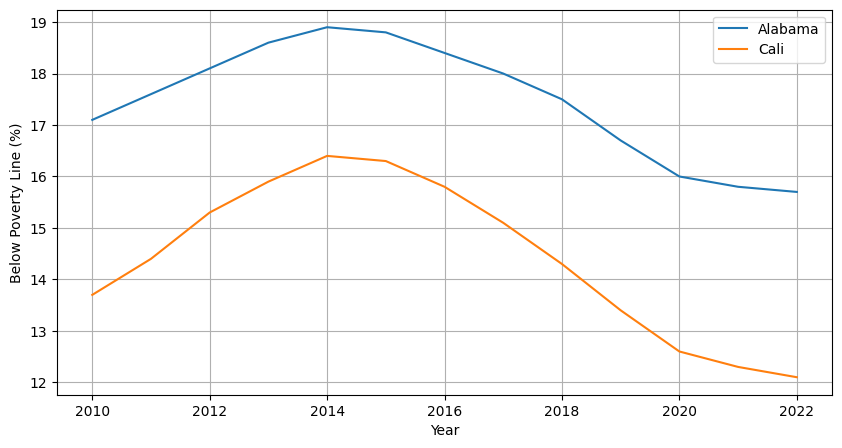

In [7]:
df = pd.read_csv('../udataset/wealth_data.csv')
us_df = pd.read_csv('../udataset/poverty_rate_US.csv')

alabama_data = df[df['state'] == 'alabama']
california_data = df[df['state'] == 'california']

plt.figure(figsize=(10, 5))
plt.plot(alabama_data['year'], alabama_data['below_poverty_line_percent'], label='Alabama')
plt.plot(california_data['year'], california_data['below_poverty_line_percent'], label='Cali')
plt.xlabel('Year')
plt.ylabel('Below Poverty Line (%)')
plt.legend()
plt.grid(True)
plt.show()


In [8]:
def interpolate_to_monthly(data, state_name):
    data['date'] = pd.to_datetime(data['year'], format='%Y')
    data = data.set_index('date')

    date_range = pd.date_range(data.index.min(), data.index.max(), freq='MS')

    interp_vals = {}

    for col in data.columns:
        if col == 'below_poverty_line_percent':
            interp_vals[col] = pchip_interpolate(data.index, data[col], date_range)

    df_monthly = pd.DataFrame(interp_vals, index=date_range)
    df_monthly['state'] = state_name
    df_monthly.reset_index(inplace=True)
    df_monthly.rename(columns={'index': 'date'}, inplace=True)

    return df_monthly

In [9]:
all_states = df['state'].unique()
print(all_states)
df_monthly_data = pd.DataFrame()

for state in all_states:
    state_data = df[df['state'] == state]
    state_monthly = interpolate_to_monthly(state_data, state)
    df_monthly_data = pd.concat([df_monthly_data, state_monthly], ignore_index=True)

df_monthly_data.to_csv('../udataset/wealth_data_interpolated.csv', index=False)

us_state_monthly = interpolate_to_monthly(us_df, 'US')
us_state_monthly.to_csv('../udataset/national_wealth_data_interpolated.csv', index=False)

['alabama' 'alaska' 'arizona' 'arkansas' 'california' 'colorado'
 'connecticut' 'delaware' 'district of columbia' 'florida' 'georgia'
 'hawaii' 'idaho' 'illinois' 'indiana' 'iowa' 'kansas' 'kentucky'
 'louisiana' 'maine' 'maryland' 'massachusetts' 'michigan' 'minnesota'
 'mississippi' 'missouri' 'montana' 'nebraska' 'nevada' 'new hampshire'
 'new jersey' 'new mexico' 'new york' 'north carolina' 'north dakota'
 'ohio' 'oklahoma' 'oregon' 'pennsylvania' 'puerto rico' 'rhode island'
 'south carolina' 'south dakota' 'tennessee' 'texas' 'utah' 'vermont'
 'virginia' 'washington' 'west virginia' 'wisconsin' 'wyoming']


/tmp/ipykernel_432594/2970108499.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['date'] = pd.to_datetime(data['year'], format='%Y')
/tmp/ipykernel_432594/2970108499.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['date'] = pd.to_datetime(data['year'], format='%Y')
/tmp/ipykernel_432594/2970108499.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: ht

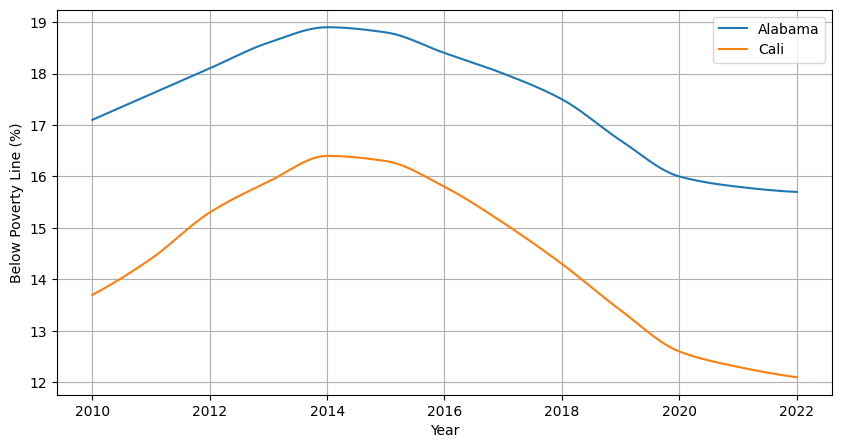

In [10]:
alabama_data = df_monthly_data[df_monthly_data['state'] == 'alabama']
california_data = df_monthly_data[df_monthly_data['state'] == 'california']

plt.figure(figsize=(10, 5))
plt.plot(alabama_data['date'], alabama_data['below_poverty_line_percent'], label='Alabama')
plt.plot(california_data['date'], california_data['below_poverty_line_percent'], label='Cali')
plt.xlabel('Year')
plt.ylabel('Below Poverty Line (%)')
plt.legend()
plt.grid(True)
plt.show()